In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## load all the tables

In [2]:
flights=pd.read_csv('flights.csv',sep=',',header=0,index_col=0)
print(flights.dtypes)
print(flights.index)
print(flights.columns)

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object
Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            336767, 336768, 336769, 336770, 336771, 336772, 336773, 336774,
            336775, 336776],
           dtype='int64', length=336776)
Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
   

In [3]:
weather=pd.read_csv('weather.csv',sep=',',header=0,index_col=0)
print(weather.dtypes)
print(weather.index)
print(weather.columns)

origin         object
year            int64
month           int64
day             int64
hour            int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
time_hour      object
dtype: object
Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            26121, 26122, 26123, 26124, 26125, 26126, 26127, 26128, 26129,
            26130],
           dtype='int64', length=26130)
Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')


In [4]:
planes=pd.read_csv('planes.csv',sep=',',header=0,index_col=0)
print(planes.dtypes)
print(planes.index)
print(planes.columns)

tailnum          object
year            float64
type             object
manufacturer     object
model            object
engines           int64
seats             int64
speed           float64
engine           object
dtype: object
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322],
           dtype='int64', length=3322)
Index(['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine'],
      dtype='object')


In [5]:
airports=pd.read_csv('airports.csv',sep=',',header=0,index_col=0)
print(airports.dtypes)
print(airports.index)
print(airports.columns)

faa       object
name      object
lat      float64
lon      float64
alt        int64
tz         int64
dst       object
tzone     object
dtype: object
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=1458)
Index(['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], dtype='object')


In [6]:
airlines=pd.read_csv('airlines.csv',sep=',',header=0,index_col=0)
print(airlines.dtypes)
print(airlines.index)
print(airlines.columns)

carrier    object
name       object
dtype: object
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')
Index(['carrier', 'name'], dtype='object')


In [7]:
flights.shape

(336776, 19)

In [8]:
weather.shape

(26130, 15)

In [9]:
planes.shape

(3322, 9)

In [10]:
airports.shape

(1458, 8)

In [11]:
airlines.shape

(16, 2)

* flights includes 336776 rows
* weather includes 26130 rows
* planes includes 3322 rows
* airports includes 1458 rows
* airlines includes 16 rows

In [12]:
flights["date"]=flights["year"].astype(str)+"-"+flights["month"].astype(str)+"-"+flights["day"].astype(str)

In [13]:
#total flights
flights.groupby("dest").count().sort_values("flight",ascending=False)["flight"].head(5)

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: flight, dtype: int64

In [14]:
#days with flights
flights.groupby("dest")["date"].nunique().head(5)

dest
ABQ    254
ACK    155
ALB    260
ANC      8
ATL    365
Name: date, dtype: int64

In [15]:
#flights per day
flightsperday=(flights.groupby("dest").count().sort_values("flight",ascending=False)["flight"]) \
               /(flights.groupby("dest")["date"].nunique())                                     
flightsperday.sort_values(ascending=False).head(5)

dest
ORD    47.350685
ATL    47.164384
LAX    44.312329
BOS    42.487671
MCO    38.580822
dtype: float64

### Now, we know that the top 5 busiest airports are ATL, ORD, LAX, BOS, MCO.

In [16]:
#get rid of the NAs and unreasonalable arrive time(>=24:00)
flights=flights[flights["arr_time"]<2400]
flights=flights.dropna().reset_index(drop=True)

#### CREATE A TIME COLUMN

In [17]:
#the arr_time in data is not in a normal format. For example, 740.0 means 7:40 a.m.. I will transform them to a proper format.
#create a date column to store the exact arrive time
flights["time"]=flights["year"].astype(str)+"-"+flights["month"].astype(str)+"-"+flights["day"].astype(str)+ \
                " "+(flights["arr_time"]//100).astype(int).astype(str)+":"+(flights["arr_time"]%100).astype(int).astype(str)
flights["time"]=pd.to_datetime(flights["time"])

## ATL inter-arrival time

In [18]:
ATLflights=flights[flights["dest"]=="ATL"].sort_values("time",ascending=True)

In [19]:
ATLflights["shifttime"]=ATLflights["time"].shift(1)

In [20]:
ATLinterarr=ATLflights["time"]-ATLflights["shifttime"]
ATLinterarr=ATLinterarr.dropna().reset_index(drop=True)

In [21]:
np.mean(ATLinterarr)

Timedelta('0 days 00:31:11.095402')

In [22]:
np.std(ATLinterarr)

Timedelta('0 days 01:15:01.349098')

### the average inter arrival time is 31 minutes 11 seconds
### the stardard deviation is 1 hour 15 minutes 1seconds

In [23]:
type(ATLinterarr)

pandas.core.series.Series

In [24]:
ATLPLOT=ATLinterarr.astype("timedelta64[m]")

* I find some extreme values that affact the plot. So, I will delete parts of the extreme values to make the plot look better.

In [25]:
ATLPLOT[ATLPLOT].count()

16834

In [26]:
ATLPLOT[ATLPLOT<150].count()

16447

In [27]:
ATLPLOT=ATLPLOT[ATLPLOT<150]

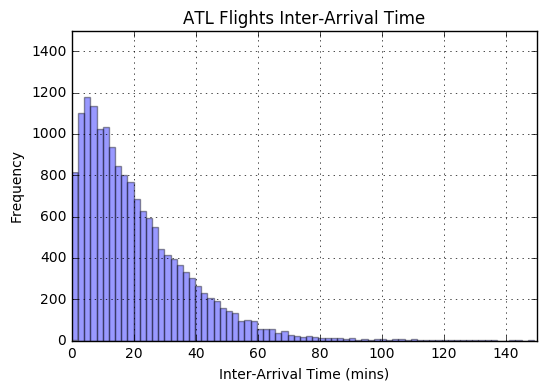

In [28]:
#histogram
#the parameters of all histograms are the same, 2mins
plt.hist(ATLPLOT,75,color="blue",alpha=0.4)
plt.axis([0, 150, 0, 1500])
plt.xlabel("Inter-Arrival Time (mins)")
plt.ylabel("Frequency")
plt.title("ATL Flights Inter-Arrival Time")
plt.grid(True)

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


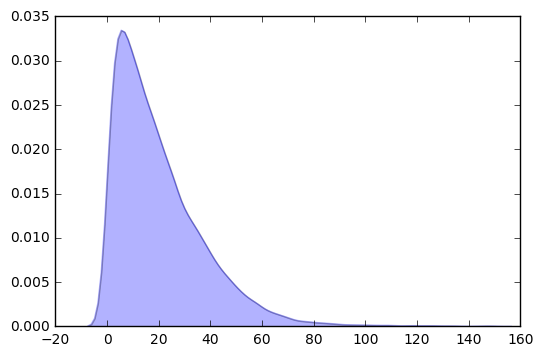

In [29]:
#Density plot
sns.kdeplot(ATLPLOT,shade=True, color="b",alpha=0.3)

## ORD inter-arrival time

In [30]:
ORDflights=flights[flights["dest"]=="ORD"].sort_values("time",ascending=True)
ORDflights["shifttime"]=ORDflights["time"].shift(1)
ORDinterarr=ORDflights["time"]-ORDflights["shifttime"]
ORDinterarr=ORDinterarr.dropna().reset_index(drop=True)
np.mean(ORDinterarr)

Timedelta('0 days 00:31:41.961968')

In [31]:
np.std(ORDinterarr)

Timedelta('0 days 01:14:22.266034')

### the average inter arrival time is 31 minutes 42 seconds
### the stardard deviation is 1 hour 14 minutes 22 seconds

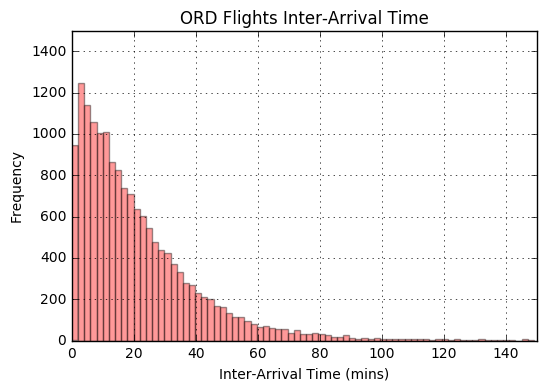

In [32]:
ORDPLOT=ORDinterarr.astype("timedelta64[m]")
ORDPLOT=ORDPLOT[ORDPLOT<150]
#histogram
plt.hist(ORDPLOT,75,color="red",alpha=0.4)
plt.axis([0, 150, 0, 1500])
plt.xlabel("Inter-Arrival Time (mins)")
plt.ylabel("Frequency")
plt.title("ORD Flights Inter-Arrival Time")
plt.grid(True)

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


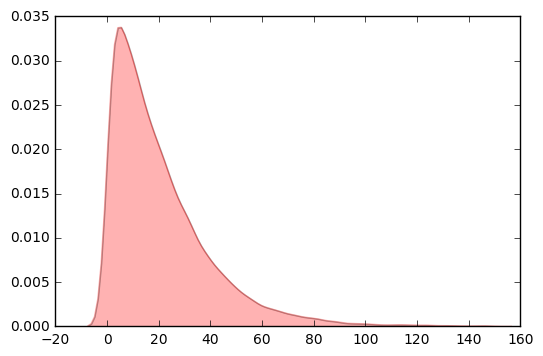

In [33]:
#Density plot
sns.kdeplot(ORDPLOT,shade=True, color="r",alpha=0.3)

## LAX inter-arrival time

In [34]:
LAXflights=flights[flights["dest"]=="LAX"].sort_values("time",ascending=True)
LAXflights["shifttime"]=LAXflights["time"].shift(1)
LAXinterarr=LAXflights["time"]-LAXflights["shifttime"]
LAXinterarr=LAXinterarr.dropna().reset_index(drop=True)
np.mean(LAXinterarr)

Timedelta('0 days 00:32:49.145747')

In [35]:
np.std(LAXinterarr)

Timedelta('0 days 01:11:09.674630')

### the average inter arrival time is 32 minutes 49 seconds
### the stardard deviation is 1 hour 11 minutes 10 seconds

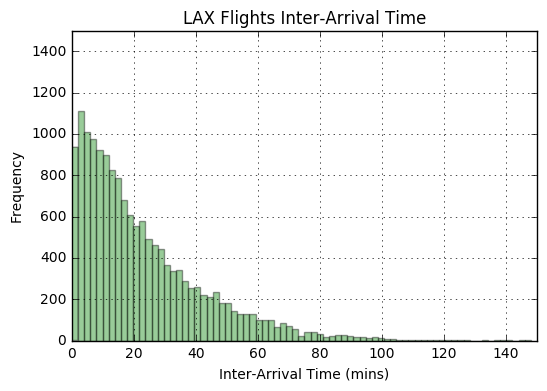

In [36]:
LAXPLOT=LAXinterarr.astype("timedelta64[m]")
LAXPLOT=LAXPLOT[LAXPLOT<150]
#histogram
plt.hist(LAXPLOT,75,color="g",alpha=0.4)
plt.axis([0, 150, 0, 1500])
plt.xlabel("Inter-Arrival Time (mins)")
plt.ylabel("Frequency")
plt.title("LAX Flights Inter-Arrival Time")
plt.grid(True)

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


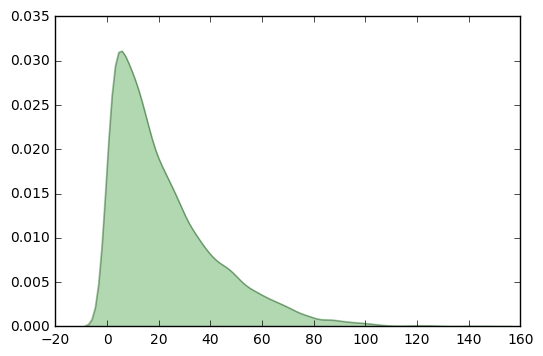

In [37]:
#Density plot
sns.kdeplot(LAXPLOT,shade=True, color="g",alpha=0.3)

## BOS inter-arrival time

In [38]:
BOSflights=flights[flights["dest"]=="BOS"].sort_values("time",ascending=True)
BOSflights["shifttime"]=BOSflights["time"].shift(1)
BOSinterarr=BOSflights["time"]-BOSflights["shifttime"]
BOSinterarr=BOSinterarr.dropna().reset_index(drop=True)
np.mean(BOSinterarr)

Timedelta('0 days 00:34:58.437354')

In [39]:
np.std(BOSinterarr)

Timedelta('0 days 01:07:37.089912')

### the average inter arrival time is 34 minutes 58 seconds
### the stardard deviation is 1 hour 7 minutes 37 seconds

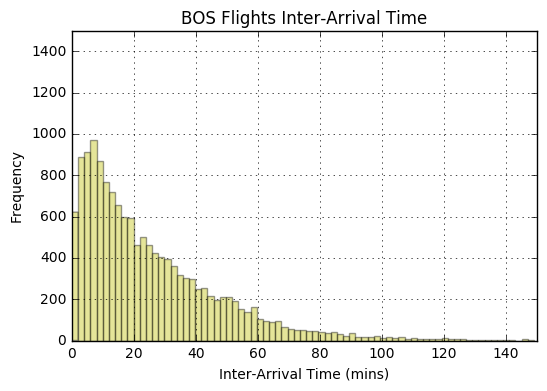

In [40]:
BOSPLOT=BOSinterarr.astype("timedelta64[m]")
BOSPLOT=BOSPLOT[BOSPLOT<150]
#histogram
plt.hist(BOSPLOT,75,color="y",alpha=0.4)
plt.axis([0, 150, 0, 1500])
plt.xlabel("Inter-Arrival Time (mins)")
plt.ylabel("Frequency")
plt.title("BOS Flights Inter-Arrival Time")
plt.grid(True)

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


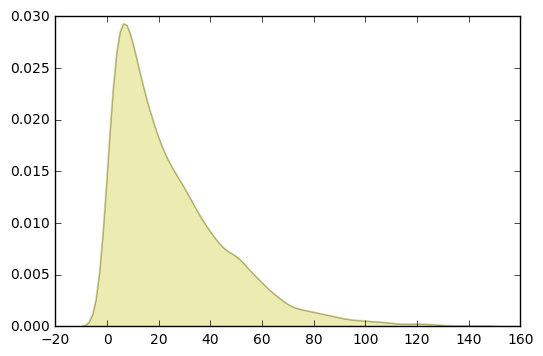

In [41]:
#Density plot
sns.kdeplot(BOSPLOT,shade=True, color="y",alpha=0.3)

## MCO inter-arrival time

In [42]:
MCOflights=flights[flights["dest"]=="MCO"].sort_values("time",ascending=True)
MCOflights["shifttime"]=MCOflights["time"].shift(1)
MCOinterarr=MCOflights["time"]-MCOflights["shifttime"]
MCOinterarr=MCOinterarr.dropna().reset_index(drop=True)
np.mean(MCOinterarr)

Timedelta('0 days 00:37:38.776504')

In [43]:
np.std(MCOinterarr)

Timedelta('0 days 01:14:25.263850')

### the average inter arrival time is 37 minutes 39 seconds
### the stardard deviation is 1 hour 14 minutes 25 seconds

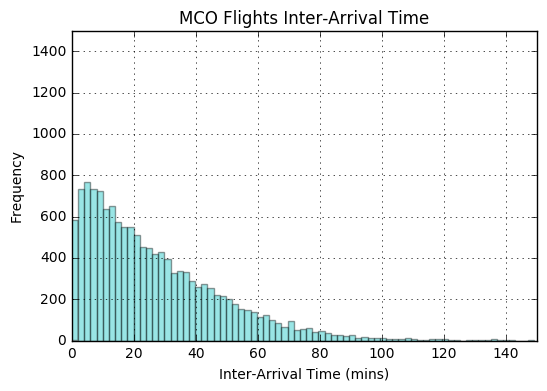

In [44]:
MCOPLOT=MCOinterarr.astype("timedelta64[m]")
MCOPLOT=MCOPLOT[MCOPLOT<150]
#histogram
plt.hist(MCOPLOT,75,color="c",alpha=0.4)
plt.axis([0, 150, 0, 1500])
plt.xlabel("Inter-Arrival Time (mins)")
plt.ylabel("Frequency")
plt.title("MCO Flights Inter-Arrival Time")
plt.grid(True)

E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


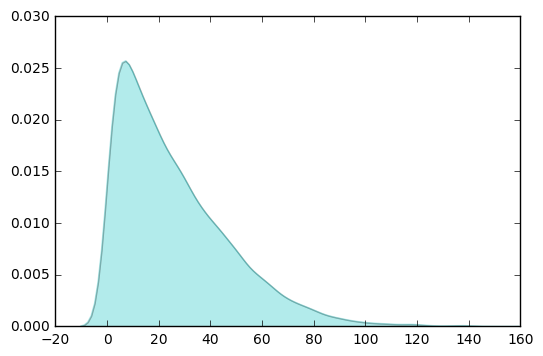

In [45]:
#Density plot
sns.kdeplot(MCOPLOT,shade=True, color="c",alpha=0.3)

# Thank you for your review.